# Logistic Regression on Iris Dataset (Multi-class Classification)

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load dataset

In [3]:
iris = load_iris(as_frame=True)
df = iris.frame
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Features and Target

In [4]:
X = df.iloc[:, :-1]   # all 4 features
y = df["target"]      # target (3 classes: 0=Setosa, 1=Versicolor, 2=Virginica)

Train-test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Train Logistic Regression Model

In [7]:
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


Predictions

In [8]:
y_pred = model.predict(X_test)

Evaluation

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Confusion Matrix

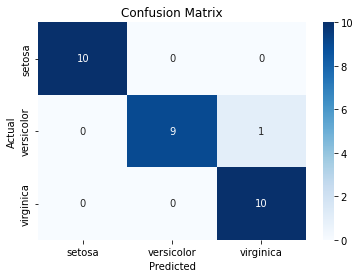

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Visualization of Decision Boundaries (using 2 features for plotting)

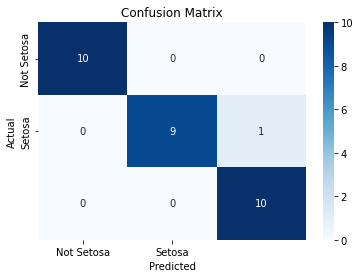

In [12]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Setosa", "Setosa"], yticklabels=["Not Setosa", "Setosa"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [13]:
# We'll use only petal length & petal width for 2D visualization
X_vis = df[["petal length (cm)", "petal width (cm)"]]
y_vis = df["target"]

In [15]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

In [17]:
model_vis = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=200)
model_vis.fit(X_train_vis, y_train_vis)

LogisticRegression(max_iter=200, multi_class='multinomial')

Create mesh grid

In [18]:
x_min, x_max = X_vis.iloc[:,0].min() - 1, X_vis.iloc[:,0].max() + 1
y_min, y_max = X_vis.iloc[:,1].min() - 1, X_vis.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

In [19]:
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


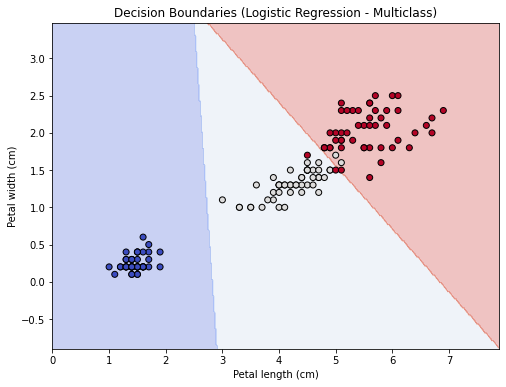

In [21]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis.iloc[:,0], X_vis.iloc[:,1], c=y_vis, edgecolors="k", cmap=plt.cm.coolwarm)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Decision Boundaries (Logistic Regression - Multiclass)")
plt.show()